# Proyecto: Aplicación de Aprendizaje No Supervisado (PCA + Clustering)
# Alumno:Witman Zavala Muñoz.
# Profesor:Ronal Coronado.
 **link de datsets**:
 * 1.- https://github.com/witman92/Proyectos-Aplicaci-n-de-Aprendizaje-No-Supervisado-PCA-Clustering-/blob/16f3994f5d2349a2f769cfd02a201b3df7df46d7/01.-%20Dataset-Clasificaci%C3%B3n%20de%20im%C3%A1genes%20de%20Intel.zip
 * 2.-  https://github.com/witman92/Proyectos-Aplicaci-n-de-Aprendizaje-No-Supervisado-PCA-Clustering-/raw/16f3994f5d2349a2f769cfd02a201b3df7df46d7/03.-Dataset-medidas-respuestas%20y%20analisis%20causa%20auditorias%20planta%20de%20alimentos..XLSX
 * 3.-  https://raw.githubusercontent.com/witman92/Proyectos-Aplicaci-n-de-Aprendizaje-No-Supervisado-PCA-Clustering-/5b993113a21858b182b0ee97323274ac7b614b49/03.-Dataset-medidas-respuestas%20y%20analisis%20causa%20auditorias%20planta%20de%20alimentos.XLSX


# DESARROLLO

# PROYECTO 1: DATASET "TIPO IMAGEN"

##Dataset-Clasificación de imágenes de Intel 150x150 en 6 categorías.edificios 0,bosque 1, glaciar 2, montaña 3, mar 4, calle 5

## 1.1: Descargar y extraer dataset

In [1]:
import requests
import zipfile
import io
import os

# URL del archivo ZIP en GitHub
url = "https://media.githubusercontent.com/media/witman92/Proyectos-Aplicaci-n-de-Aprendizaje-No-Supervisado-PCA-Clustering-/refs/heads/main/01.-%20Dataset-Clasificaci%C3%B3n%20de%20im%C3%A1genes%20de%20Intel.zip?download=true"

# Nombre del archivo a guardar
zip_filename = "01.zip"
extract_dir = "proyecto_descargado"

try:
    print("Descargando archivo desde GitHub...")
    response = requests.get(url)
    response.raise_for_status()  # Lanza error si la descarga falla

    # Guardar el archivo ZIP en disco
    with open(zip_filename, "wb") as f:
        f.write(response.content)

    print("Archivo descargado correctamente. Extrayendo contenido...")

    # Crear directorio de extracción si no existe
    os.makedirs(extract_dir, exist_ok=True)

    # Extraer el ZIP
    with zipfile.ZipFile(zip_filename, "r") as zip_ref:
        zip_ref.extractall(extract_dir)

    print(f"✅ Archivo descargado y extraído correctamente en la carpeta: '{extract_dir}'")

except requests.exceptions.RequestException as e:
    print(f"❌ Error al descargar el archivo: {e}")

except zipfile.BadZipFile:
    print("❌ El archivo descargado no es un ZIP válido.")


Descargando archivo desde GitHub...
Archivo descargado correctamente. Extrayendo contenido...
✅ Archivo descargado y extraído correctamente en la carpeta: 'proyecto_descargado'


## 1.2: Listar contenido del dataset

In [2]:
import os

# Ruta al conjunto de datos extraído
extracted_dataset_path = extract_dir

# Listar el contenido del directorio extraído
print(f"Contenido de '{extracted_dataset_path}':")
for item in os.listdir(extracted_dataset_path):
    item_path = os.path.join(extracted_dataset_path, item)
    if os.path.isdir(item_path):
        print(f"Directorio: {item}")
    else:
        print(f"Archivo: {item}")


Contenido de 'proyecto_descargado':
Directorio: seg_test
Directorio: seg_pred
Directorio: seg_train


## 1.3: Definir nombres de clases

In [3]:
# Define the class names based on the dataset description
nombre_clases = ['edificios', 'bosque', 'glaciar', 'montaña', 'mar', 'calle']
print("Nombres de las clases:", nombre_clases)


Nombres de las clases: ['edificios', 'bosque', 'glaciar', 'montaña', 'mar', 'calle']


## 1.4: Cargar datasets (antes de normalizar)

In [4]:
from tensorflow.keras.utils import image_dataset_from_directory

# Define batch size
TAMANO_LOTE = 32

# Load the training dataset
datos_entrenamiento = image_dataset_from_directory(
    os.path.join(extract_dir, 'seg_train', 'seg_train'),
    labels='inferred',
    label_mode='int',
    image_size=(150, 150),
    interpolation='nearest',
    batch_size=TAMANO_LOTE,
    shuffle=True
)

# Load the test dataset
datos_pruebas = image_dataset_from_directory(
    os.path.join(extract_dir, 'seg_test', 'seg_test'),
    labels='inferred',
    label_mode='int',
    image_size=(150, 150),
    interpolation='nearest',
    batch_size=TAMANO_LOTE,
    shuffle=False
)

print("Datasets cargados.")


Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.
Datasets cargados.


## 1.5: Normalizar datasets

In [5]:
import tensorflow as tf

AUTOTUNE = tf.data.AUTOTUNE

# Cachear, mezclar y prefetch para acelerar
datos_entrenamiento = datos_entrenamiento.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
datos_pruebas = datos_pruebas.cache().prefetch(buffer_size=AUTOTUNE)

# Definir la función de normalización
def normalizar(imagen, etiqueta):
    imagen = tf.cast(imagen, tf.float32) / 255.0
    return imagen, etiqueta

# Aplicar normalización a los datasets
datos_entrenamiento_normalizado = datos_entrenamiento.map(normalizar).prefetch(buffer_size=AUTOTUNE)
datos_pruebas_normalizado = datos_pruebas.map(normalizar).prefetch(buffer_size=AUTOTUNE)

print("Datasets cacheados, normalizados y optimizados para entrenamiento.")


Datasets cacheados, normalizados y optimizados para entrenamiento.


## 1.6: Mostrar la primera imagen normalizada

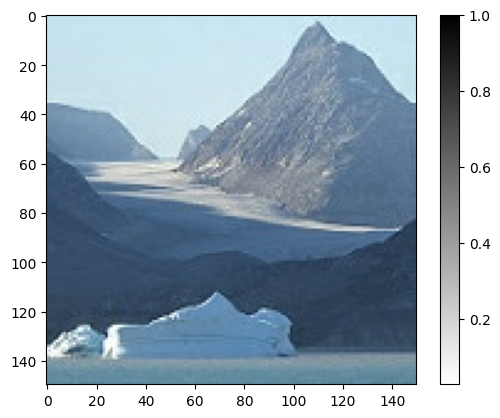

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Mostrar una imagen de los datos de entrenamiento
for imagen_batch, etiqueta_batch in datos_entrenamiento_normalizado.take(1):
    break

imagen = imagen_batch.numpy()

plt.figure()
plt.imshow(imagen[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


## 1.7: Mostrar 25 imágenes del dataset

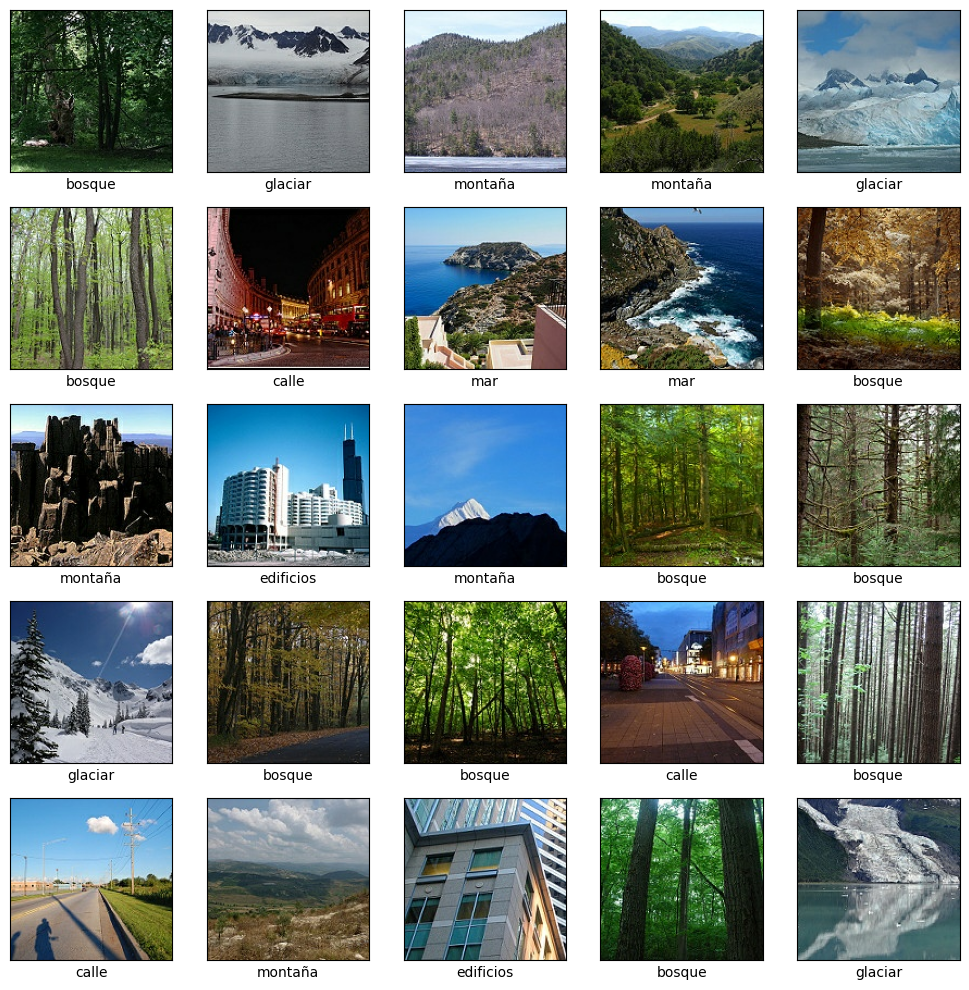

In [7]:
plt.figure(figsize=(10,10))
for i, (imagen_batch, etiqueta_batch) in enumerate(datos_entrenamiento.take(1)):
    for j in range(min(25, len(imagen_batch))):
        imagen = imagen_batch[j].numpy().astype("uint8")
        etiqueta = etiqueta_batch[j].numpy()

        plt.subplot(5,5,j+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(imagen)
        plt.xlabel(nombre_clases[etiqueta])

plt.tight_layout()
plt.show()


## 1.8: Crear el modelo CNN

In [8]:
# Crear el modelo CNN
modelo = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 1.9: Compilar modelo

In [9]:
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'],
    run_eagerly=False
)


## 1.10: Definir número de ejemplos

In [10]:
num_ej_entrenamiento = 14034
num_ej_pruebas = 3000

print(f"Número de ejemplos de entrenamiento: {num_ej_entrenamiento}")
print(f"Número de ejemplos de pruebas: {num_ej_pruebas}")


Número de ejemplos de entrenamiento: 14034
Número de ejemplos de pruebas: 3000


## 1.11: Entrenar modelo

In [11]:
import math

historial = modelo.fit(
    datos_entrenamiento_normalizado,
    epochs=5,  # Aumenté el número de épocas para mejor entrenamiento
    steps_per_epoch= math.ceil(num_ej_entrenamiento / TAMANO_LOTE),
    validation_data=datos_pruebas_normalizado,
    validation_steps= math.ceil(num_ej_pruebas / TAMANO_LOTE)
)


Epoch 1/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 434s 982ms/step - accuracy: 0.5288 - loss: 1.1852 - val_accuracy: 0.7410 - val_loss: 0.6989
Epoch 2/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 447s 995ms/step - accuracy: 0.7668 - loss: 0.6368 - val_accuracy: 0.7940 - val_loss: 0.5863
Epoch 3/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 424s 966ms/step - accuracy: 0.8237 - loss: 0.4899 - val_accuracy: 0.7837 - val_loss: 0.6087
Epoch 4/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 436s 994ms/step - accuracy: 0.8815 - loss: 0.3303 - val_accuracy: 0.7800 - val_loss: 0.6493
Epoch 5/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 438s 998ms/step - accuracy: 0.9289 - loss: 0.2109 - val_accuracy: 0.8180 - val_loss: 0.5984


## 1.12: Grafico funcion de perdida

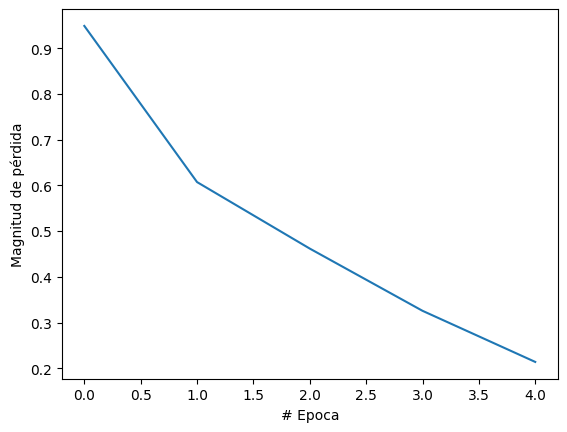

In [12]:
#Ver la funcion de perdida
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

## 1.13 Evaluacion del modelo

Evaluating the model on the test dataset...
94/94 ━━━━━━━━━━━━━━━━━━━━ 25s 261ms/step - accuracy: 0.7759 - loss: 128.6295

Loss on test dataset: 173.7476348876953
Accuracy on test dataset: 0.7143333554267883

Getting predictions for the test dataset...
94/94 ━━━━━━━━━━━━━━━━━━━━ 24s 257ms/step


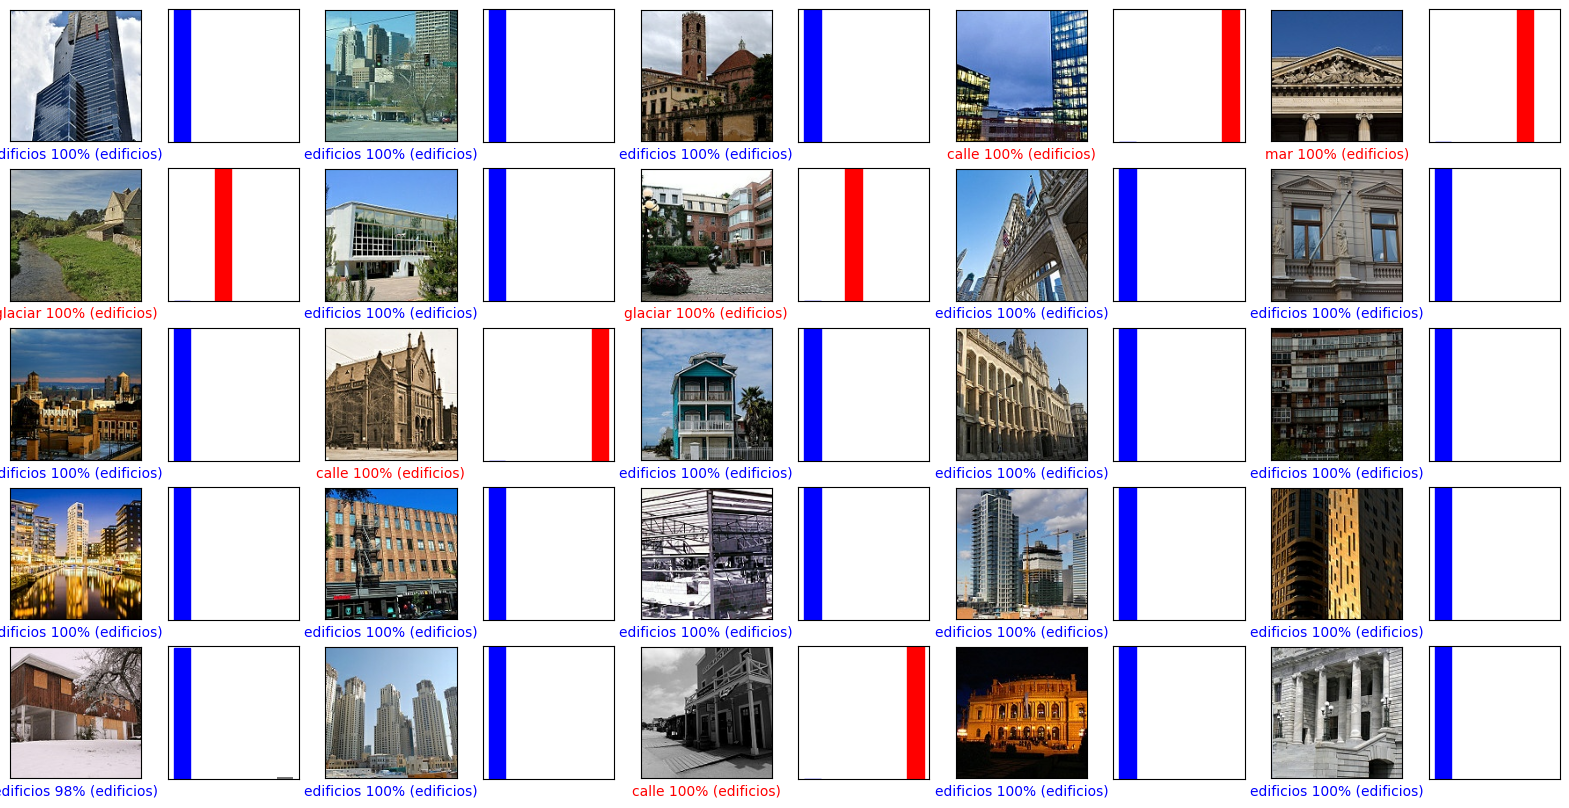

In [14]:
# Evaluate the model on the test dataset
print("Evaluating the model on the test dataset...")
loss, accuracy = modelo.evaluate(datos_pruebas)

print(f"\nLoss on test dataset: {loss}")
print(f"Accuracy on test dataset: {accuracy}")

# Get predictions for the test dataset
print("\nGetting predictions for the test dataset...")
predicciones = modelo.predict(datos_pruebas)

# Convert the test dataset to numpy arrays for plotting
# Note: This loads the entire dataset into memory. For very large datasets,
# consider iterating through batches for plotting.
imagenes_prueba = np.concatenate([x for x, y in datos_pruebas], axis=0)
etiquetas_prueba = np.concatenate([y for x, y in datos_pruebas], axis=0)


# Pintar una cuadricula con varias predicciones, y marcar si fue correcta (azul) o incorrecta (roja)
import matplotlib.pyplot as plt
import numpy as np

# Define the class names based on the dataset description
class_names = ['edificios', 'bosque', 'glaciar', 'montaña', 'mar', 'calle']

def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  # Display the image directly
  plt.imshow(img)

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if etiqueta_prediccion == etiqueta_real:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[etiqueta_prediccion],
                                100*np.max(arr_predicciones),
                                class_names[etiqueta_real]),
                                color=color)

def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
  arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  # Use the number of classes for the range of the bar plot
  grafica = plt.bar(range(len(class_names)), arr_predicciones, color="#777777")
  plt.ylim([0, 1])
  etiqueta_prediccion = np.argmax(arr_predicciones)

  grafica[etiqueta_prediccion].set_color('red')
  grafica[etiqueta_real].set_color('blue')

filas = 5
columnas = 5
num_imagenes = filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
  plt.subplot(filas, 2*columnas, 2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(filas, 2*columnas, 2*i+2)
  graficar_valor_arreglo(i, predicciones, etiquetas_prueba)

## 1.14:Prueba conn una imagen suelta.

In [15]:
#Probar una imagen suelta
imagen = imagenes_prueba[4] #AL ser la variable imagenes_prueba solo tiene lo que se le puso en el bloque anterior heheh
imagen = np.array([imagen])
prediccion = modelo.predict(imagen)

print("Prediccion: " + nombre_clases[np.argmax(prediccion[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Prediccion: mar


# PROYECTO 2 :DATASET " TIPO TABULARES"

#*FORECASTING* CON REDES LSTM

## problema a resolver

Crear y entrenar una Red LSTM usando el enfoque multivariado + uni-step + **variables temporales**


En este caso tomaremos como entrada al modelo 6 covariables (las mismas usadas en el video anterior) **junto con las variables temporales** y a la salida intentaremos predecir 4 horas de potencia eolica (de ahí el término multi-step).

1. **Codificación de las variables temporales**
2. **El pre-procesamiento** para que no se realice el escalamiento de las variables temporales
2. **La Red LSTM**, para que sea entrenada incluyendo las variables temporales

## 1. Introducción

En el video anterior vimos un panorama general de los diferentes enfoques que podemos usar para realizar pronósticos sobre series de tiempo usando Redes LSTM.

En este video comenzaremos a ver el primer paso antes de implementar cualquiera de estos modelos predictivos, así que veremos cómo realizar el análisis exploratorio y el pre-procesamiento del set de datos.

El datset series temporales](https://zenodo.org/records/5516539?utm_source=chatgpt.com), un set de datos de un parque eolico.



## 2.-Preperacion del datset

- Dataet subido a mi github y elazado diretamente.

###2.1 Lectura del set de datos

In [16]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np

# URL del dataset CSV
url = "https://github.com/witman92/Proyectos-Aplicaci-n-de-Aprendizaje-No-Supervisado-PCA-Clustering-/raw/bf5fab4b1883196108753d671190f1d875fbb8b9/02.-Conjunto%20de%20datos%20de%20series%20temporales%20de%20viento%20de%20una%20turbina%20e%C3%B3lica%20cada%2010%20minutos..csv"

try:
    # Cargar el dataset desde la URL
    df = pd.read_csv(url, encoding='utf-8')

    # Mostrar las primeras 10 filas en formato tabular
    print("\nPrimeros datos:")
    print(tabulate(df.head(10), headers='keys', tablefmt='pretty', showindex=False))

    # Mostrar las dimensiones del DataFrame
    print(f"\nDimensiones: {df.shape[0]} filas \u00d7 {df.shape[1]} columnas")

except Exception as e:
    # Mostrar mensaje de error si falla la carga
    print(f"\nError al cargar el archivo CSV: {e}")


Primeros datos:
+---------------------+------------------------+----------------------+
|        Tiempo       | Velocidad viento (m/s) | Potencia eólica (kW) |
+---------------------+------------------------+----------------------+
| 2014-10-07 01:20:00 |          8.22          |   40.5261726540444   |
| 2014-10-07 01:30:00 |          8.09          |   38.5525395633143   |
| 2014-10-07 01:50:00 |          7.21          |   21.3136833380818   |
| 2014-10-07 02:00:00 |          6.75          |   18.031417545132    |
| 2014-10-07 02:10:00 |          6.52          |   16.5932813592686   |
| 2014-10-07 02:20:00 |          5.94          |   11.7997099121966   |
| 2014-10-07 02:30:00 |          5.62          |   9.66808257142117   |
| 2014-10-07 02:40:00 |          5.74          |   10.4593488564842   |
| 2014-10-07 02:50:00 |          5.65          |   11.492786655961    |
| 2014-10-07 03:00:00 |          6.06          |   14.2887668678287   |
+---------------------+------------------------

###2.2 Procesamiento inicial del dataset

El primer paso consiste en convertir la columna *Date Time* del formato *object* (string + datos numéricos) al formato *datetime*.

Esto facilitará la visualización del set de datos y el análisis exploratorio, así como el pre-procesamiento:

In [17]:
df.columns = df.columns.str.strip()       # Elimina espacios en blanco
df.columns = df.columns.str.replace(' ', '_')  # Reemplaza espacios por guiones bajos
df.columns = df.columns.str.lower()       # Convierte a minúsculas
print(df.columns.tolist())


['tiempo', 'velocidad_viento_(m/s)', 'potencia_eólica_(kw)']


In [18]:
if 'tiempo' in df.columns:          # Verifica si la columna 'tiempo' existe en el DataFrame
    print(df['tiempo'].dtype)       # Imprime el tipo de dato de la columna 'tiempo'


object


In [19]:
# Pasar la columna "tiempo" al formato datetime
if 'tiempo' in df.columns:
    df['datetime'] = pd.to_datetime(
        df['tiempo'],
        format = '%Y-%m-%d %H:%M:%S' # Corrected format based on the input data
    )

    # Fijemos esta nueva columna como índice del DataFrame
    df = df.set_index('datetime')

    # Ordenemos el dataset de forma ascendente según "datetime"
    df.sort_index(inplace=True)

    # Y finalmente eliminemos la columna "tiempo" original
    df = df.drop(columns=['tiempo'])
    print("Column 'tiempo' processed and converted to 'datetime' index.")
else:
    print("Column 'tiempo' not found in DataFrame. Please check column names or ensure the dataset is loaded correctly.")
df

Column 'tiempo' processed and converted to 'datetime' index.


velocidad_viento_(m/s)  potencia_eólica_(kw)
datetime                                                         
2014-10-07 01:20:00                    8.22             40.526173
2014-10-07 01:30:00                    8.09             38.552540
2014-10-07 01:50:00                    7.21             21.313683
2014-10-07 02:00:00                    6.75             18.031418
2014-10-07 02:10:00                    6.52             16.593281
...                                     ...                   ...
2015-10-06 23:10:00                    7.45             30.580953
2015-10-06 23:20:00                    7.15             28.455153
2015-10-06 23:30:00                    7.27             30.080422
2015-10-06 23:40:00                    8.19             42.483618
2015-10-06 23:50:00                    7.85             38.560957

[39195 rows x 2 columns]

###2.3.-Análisis exploratorio

El primer paso en este análisis es entender las [variables de nuestro dataset](https://www.bgc-jena.mpg.de/wetter/Weatherstation.pdf):

- *velocidad_viento_(m/s)
- *potencia_eólica_(kw)

Tendremos dos tipos de variables al momento de implementar los modelos LSTM:

- Variable a predecir: la variable a pronosticar (salida del modelo LSTM). En este caso es **potencia_eólica_(kw)*
- Variables predictoras (o covariables): las variables de entrada al modelo LSTM a partir de las cuales se realizará la predicción.
  - Puede incluir la variable a predecir (*potencia_eólica_(kw)*)
  - Puede incluir la variable tiempo (columna *datetime*)

###2.4.- Visualizacion datset

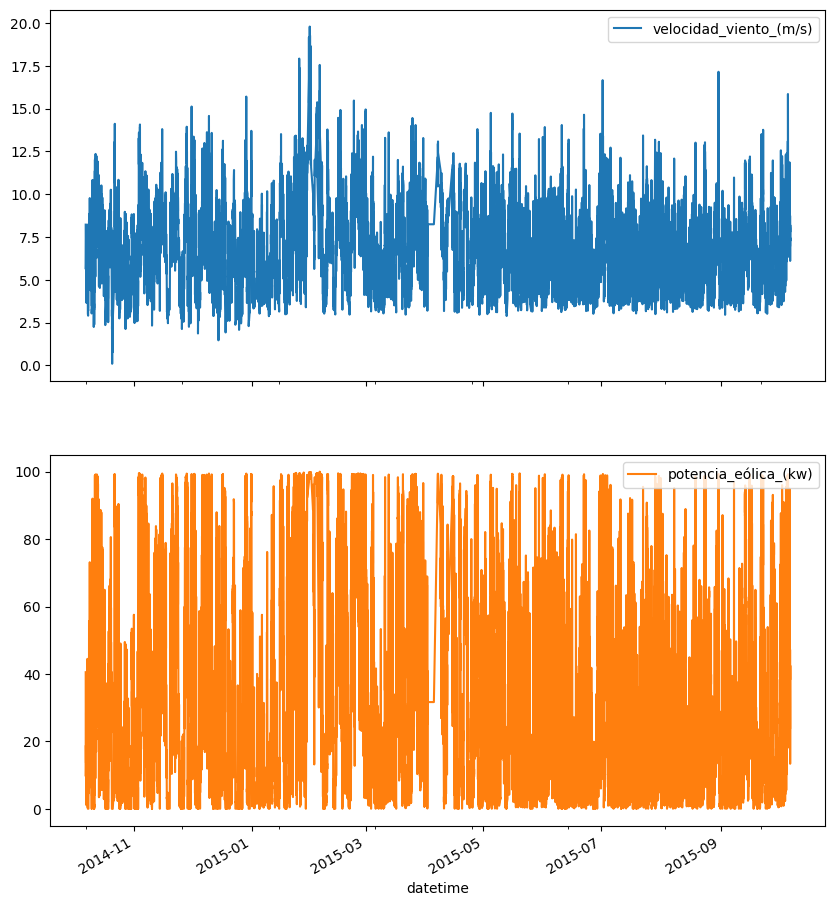

In [20]:
# Dibujemos nuestras variables
cols = df.columns

# N = 24*30*12 # Dibujar 1 año continuo
N = df.shape[0]
plots = df[cols][0:N]
plots.index = df.index[0:N]
_ = plots.plot(subplots=True, figsize=(10,12))

Observaciones generales de ambos gráficos:

- Ambas son series de tiempo que exhiben patrones
dinámicos y cambios constantes.
- Es evidente que la potencia eólica es una función de la velocidad del viento, aunque la relación no es lineal a lo largo de todo el rango (debido a los límites de operación de la turbina y su curva de potencia).
- Los rangos de valores de cada variable son diferentes, lo que refuerza la necesidad de escalar los datos antes de entrenar un modelo, tal como se mencionó en las observaciones anteriores.

###2.5.-El segundo paso es verificar si existen datos faltantes:

In [21]:
# Verificar si hay datos faltantes
print('Cantidad de NaNs:')
for column in df:
    nans = df[column].isna().sum()
    print(f'\tColumna {column}: {nans}')

Cantidad de NaNs:
	Columna velocidad_viento_(m/s): 9
	Columna potencia_eólica_(kw): 5


###2.6.-El tercer paso es garantizar que la periodicidad de las muestras es exactamente de 1 hora:

In [22]:
# Verificar si la periodicidad de las muestras es exactamente
# 1 hora (3600 secs)

# Calcular diferencias (en segundos) entre cada par de datos
# consecutivos
df_time_diffs = df.index.to_series().diff().dt.total_seconds()
print(df_time_diffs.value_counts())

datetime
600.0      37832
1200.0       357
1800.0       203
2400.0       157
3000.0       104
           ...  
42000.0        1
21600.0        1
28800.0        1
64200.0        1
29400.0        1
Name: count, Length: 84, dtype: int64


Vemos que:

- 37 832 de registros tienen diferencias de 600 s (10 min) y secesivamente.
En un momento veremos cómo corregir este comportamiento.

### 2.7.-Manejo de datos faltantes

Dado el reducido número de datos faltantes, podemos usar una simple interpolación para completarlos:

In [23]:
# Interpolación lineal para completar datos faltantes
columns = ['velocidad_viento_(m/s)', 'potencia_eólica_(kw)']

for column in columns:
    df[column] = df[column].interpolate(method='linear')

# Verificar que no hay datos faltantes
print('Cantidad de NaNs:')
for column in df:
    nans = df[column].isna().sum()
    print(f'\tColumna {column}: {nans}')

Cantidad de NaNs:
	Columna velocidad_viento_(m/s): 0
	Columna potencia_eólica_(kw): 0


###2.8.- Ajuste de la periodicidad del dataset


In [24]:
# Eliminar duplicados para corregir el problema de diferencias
# de 0.0 s
df.drop_duplicates(keep='first', inplace=True, ignore_index=False)

# Y verificar que han sido eliminados
df_time_diffs = df.index.to_series().diff().dt.total_seconds()
print(df_time_diffs.value_counts())

datetime
600.0      37331
1200.0       473
1800.0       220
2400.0       149
3000.0       102
           ...  
30600.0        1
31200.0        1
28800.0        1
64200.0        1
29400.0        1
Name: count, Length: 83, dtype: int64


Y ahora corrijamos los datos restantes para garantizar que entre pares de datos consecutivos habrá una periodicidad de 1 hora.

Usaremos el método *asfreq* de Pandas. Como aparecerán nuevos datos, usaremos el método *bfill* para rellenar estos nuevos datos:

In [25]:
# Reinterpolar el dataset con una periodicidad de 1 hora
df2 = df.asfreq(freq='H', method='bfill')

# Y verificar que la totalidad del dataset tiene esta periodicidad
df_time_diffs = df2.index.to_series().diff().dt.total_seconds()
print(df_time_diffs.value_counts())

datetime
3600.0    8758
Name: count, dtype: int64


/tmp/ipython-input-2643341853.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df2 = df.asfreq(freq='H', method='bfill')


In [26]:
# Verificar que el dataset resultante no contiene NaNs:
print('Cantidad de NaNs:')
for column in df:
    nans = df2[column].isna().sum()
    print(f'\tColumna {column}: {nans}')

Cantidad de NaNs:
	Columna velocidad_viento_(m/s): 0
	Columna potencia_eólica_(kw): 0


In [27]:
# Y finalmente verificar las columnas originales y modificadas
# para constatar que los valores promedio no cambian

for column in df:
    print(f'Promedios original/modificado: {df[column].mean():.2f}/{df2[column].mean():.2f}')

Promedios original/modificado: 6.89/6.93
Promedios original/modificado: 30.64/32.29


En este punto ya contamos con un dataset íntegro (no contiene datos faltantes ni *outliers* y tiene una periodicidad de 1 hora).

Solo nos resta guardarlo:

## 3. Lectura del set de datos ya procesado

In [28]:
print('Primeras 5 filas del dataset limpio:')
print(df2.head())
print(f'Dimensiones del dataset limpio: {df2.shape[0]} filas x {df2.shape[1]} columnas')

Primeras 5 filas del dataset limpio:
                     velocidad_viento_(m/s)  potencia_eólica_(kw)
datetime                                                         
2014-10-07 01:20:00                    8.22             40.526173
2014-10-07 02:20:00                    5.94             11.799710
2014-10-07 03:20:00                    6.21             12.994380
2014-10-07 04:20:00                    6.29             14.668212
2014-10-07 05:20:00                    7.25             26.078764
Dimensiones del dataset limpio: 8759 filas x 2 columnas


##4. Análisis detallado de la variable tiempo
###4.1. Características básicas
Veamos algunas características básicas del índice de nuestra serie (el cual contiene, precisamente, la variable tiempo):

In [29]:
# Va el periodo de un año
# Es decir cantidad de dias
print(df2.index[0])
print(df2.index[-1])
print(df2.index[-1]-df2.index[0])

2014-10-07 01:20:00
2015-10-06 23:20:00
364 days 22:00:00


In [30]:
# La serie tiene frecuencia horaria:tomada por cada hora tenemos un registro
# o muestra
pd.infer_freq(df2.index)

'h'

Y vemos que cada marca temporal tiene los datos de año, mes, día y hora.

La idea es presentar esta información al modelo pero antes de determinar cómo hacerlo tenemos qué encontrar cuáles de estas variables (año, mes, día, hora) son relevantes para predecir potencia eolica

### 4.2. ¿Qué elementos de la variable temporal resultan relevantes?

Podríamos presentar al modelo toda la información incluida en cada marca de tiempo (año, mes, día, hora) pero esto podría afectar el entrenamiento pues tendríamos muchas variables y no necesariamente todas son relevantes.

La pregunta es entonces, ¿cómo sabemos cuáles de estas variables temporales son relevantes al momento de predecir la temperatura?

Una manera de lograr esto es usando la [Transformada de Fourier](https://youtu.be/h4PTucW3Rm0?si=UxDr_kaKP6IAh-jj), una herramienta matemática que nos permite conocer los **componentes en frecuencia de una señal**.

Los componentes en frecuencia son aquellos elementos de la señal que se repiten con una cierta periodicidad (cada cierto tiempo) y eso es lo que nos interesa encontrar en nuestra señal.

Entendamos la idea de la Transformada de Fourier con un ejemplo:

> Creemos una señal cosenoidal, con una frecuencia de 100 Hz (es decir que tiene 100 ciclos en 1 segundo) y veamos su espectro en frecuencia calculado con la Transformada de Fourier.

Comencemos creando la señal y dibujándola con respecto al tiempo:

In [31]:
import plotly.express as px
import numpy as np

# Crear la señal
N = 2000                # Número total de muestras (datos): [muestras]
muestras_seg = 4000   # Cantidad de muestras en 1 segundo: [muestras/s]
t = np.linspace(0.0, N/muestras_seg, N ) # Tiempo: desde 0 hasta N/muestras_per_seg = 0.83 s
y = np.cos(100.0 * 2.0*np.pi*t)

# Graficarla con respecto al tiempo
fig = px.line(x=t[0:100], y=y[0:100])
fig.update_layout(xaxis_title='Tiempo (s)')
fig.show()

Vemos que la señal:

- Tiene un periodo de 0.01 segundos
- Lo que equivale a una frecuencia de 1/0.01 Hz = 100 Hz

La idea ahora es llegar a esta misma conclusión pero usando la Transformada de Fourier:

In [32]:
# 1. Calcular la magnitud de la Transformada de Fourier derecha
tf = np.abs(np.fft.rfft(y,N))

# 2. Calcular vector frecuencias (eje horizontal)
frecs = np.fft.rfftfreq(N, d=1./muestras_seg)

# 3. Graficar
fig = px.line(x=frecs, y=tf)
fig.update_layout(xaxis_title=f'Frecuencia (1/s, Hz)')
fig.show()

Y vemos que:

- En la gráfica hay un pico exactamente a una frecuencia de 100 Hz
- Lo que equivale a un periodo de 1/100 = 0.01 s

La gráfica anterior es lo que se conoce como el **espectro en frecuencia de la señal**.

Y podemos seguir la misma lógica anterior para ver el espectro en frecuencia de la potencia eolica .

Comencemos extrayendo esta variable y viendo su comportamiento en el tiempo:

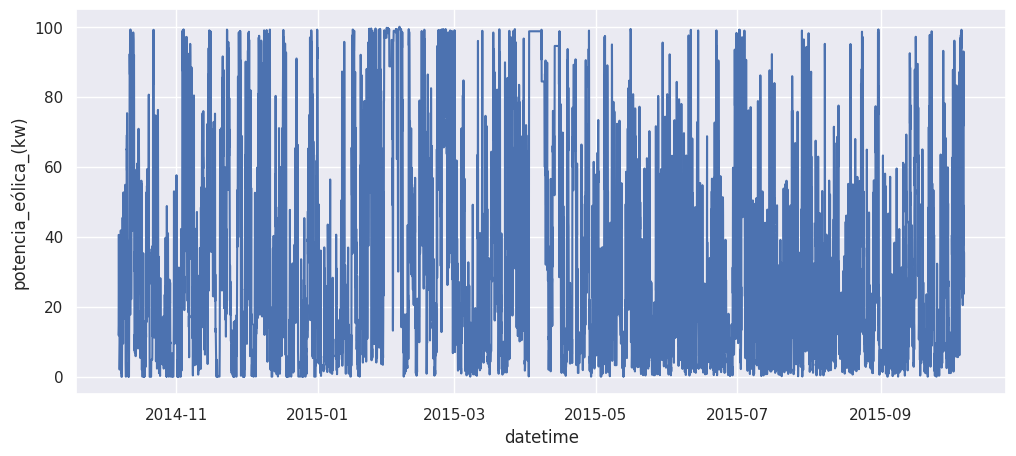

In [33]:
# Importar seaborn
import seaborn as sns
sns.set()

# Extraer columna potencia
temp = df2['potencia_eólica_(kw)']

# Y graficarla
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(temp, ax=ax);

Y vemos que efectivamente hay algo de periodicidad en esta Serie de Tiempo.

Pero no resulta fácil si está asociada con el año, con el mes, con el día o con la hora. Así que podemos usar la Transformada de Fourier para ver esto más claramente:

In [34]:
# 0. Parámetros de la serie de tiempo
N = len(temp)      # Cantidad de muestras: [muestras]
muestras_hora = 1            # Número de muestras/horas: [muestras/h]

# 1. Calcular la magnitud de la Transformada de Fourier derecha
tf = np.abs(np.fft.rfft(temp,N))

# 2. Calcular vector frecuencias (eje horizontal)
frecs = np.fft.rfftfreq(N, d=1./muestras_hora)

# 3. Graficar
# Como tenemos 1 muestra por hora pero la serie dura varios años
# usaremos una escala logarítmica en el eje horizontal
fig = px.line(x=frecs, y=tf, log_x=True)
fig.update_layout(xaxis_title=f'Frecuencia (1/H)')
fig.show()

Y en el espectro en frecuencia de nuestra Serie de Tiempo vemos dos componentes predominantes, ubicados en las frecuencias:

1. $570.841^{-6}$ [1/H]
2. $0.0416714$ [1/H]

Pero no nos interesa saber la frecuencia sino el equivalente en horas, días, semanas, años, etc.

Para hallar esta equivalencia simplemente calculamos el valor inverso (para pasar de frecuencia a tiempo):

In [35]:
frec1 = 570.841e-6
frec2 = 0.0416714

print(f'La frecuencia {frec1} equivale a {1/frec1} horas')
print(f'La frecuencia {frec2} equivale a {1/frec2} horas')

La frecuencia 0.000570841 equivale a 1751.8012896761095 horas
La frecuencia 0.0416714 equivale a 23.997273909683862 horas


Vemos que la segunda frecuencia equivale prácticamente a 24 horas, es decir 1 día.

Por otra parte, la primera frecuencia equivale a 1751.8012896761095 horas. Hagamos la conversión a años teniendo en cuenta que:

- 1 año tiene **en promedio** 365.25 días (para incluir años bisiestos)
- 1 día tiene 24 horas

Así que, 1751.8012896761095 horas equivalen a:

$1751.8012896761095 \text{ horas} x \frac{1 \text{ día}}{24 \text{ horas}} x \frac{1 \text{ año}}{365.25 \text{ días}}$:

In [36]:
resultado = (1/frec1)*(1/24)*(1/365.25)
print(f'La frecuencia {frec1} equivale a {resultado} años')

La frecuencia 0.000570841 equivale a 0.1998404391599486 años


###4.3. ¿Cómo codificar el año y el día?

Requisitos que debe cumplir la codificación:

1. Debe tener en cuenta el comportamiento cíclico/periódico de la señal a predecir
2. Debe haber continuidad en la representación numérica que usemos para el año y el día


In [37]:
# Codificar cada combinación AAAA-MM-DD HH:MM:SS a su representación
# en segundos
tiempo_s = df2.index.map(pd.Timestamp.timestamp)
tiempo_s

Index([1412644800.0, 1412648400.0, 1412652000.0, 1412655600.0, 1412659200.0,
       1412662800.0, 1412666400.0, 1412670000.0, 1412673600.0, 1412677200.0,
       ...
       1444141200.0, 1444144800.0, 1444148400.0, 1444152000.0, 1444155600.0,
       1444159200.0, 1444162800.0, 1444166400.0, 1444170000.0, 1444173600.0],
      dtype='float64', name='datetime', length=8759)

In [38]:
# Por ejemplo, entre dos instantes de tiempo consecutivos
# habrá exactamente 3.600 segundos = 1 hora!
tiempo_s[2]-tiempo_s[1]

np.float64(3600.0)

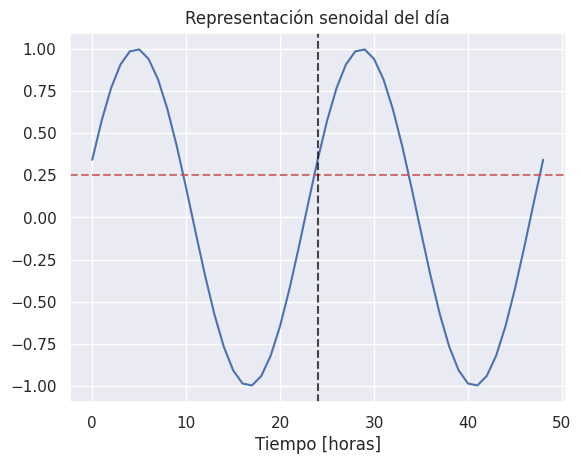

In [39]:
# Definir 1 día en segundos como 24 horas x 60 min x 60 s
dia = 24*60*60

# Representar el día senoidal y cosenoidalmente
# La frecuencia de la función será 1/día
dia_sin = np.sin(tiempo_s * (2 * np.pi / dia))

# Graficar 2 días (48 horas)
fig, ax = plt.subplots()
plt.plot(np.array(dia_sin)[:49])
plt.xlabel('Tiempo [horas]')
plt.title('Representación senoidal del día')

# Dibujar línea horizontal en y = 0.5
ax.axhline(0.25, color='r', linestyle='--', alpha=0.8)

# Dibujar línea vertical en 24 horas
ax.axvline(24, color='k', linestyle='--', alpha=0.8);

Vemos que:

1. No hay saltos
2. Hay periodicidad: la hora 0 equivale a la hora 24, la hora 1 a la hora 25, etc.
3. 👎👎 Varias horas son codificadas con el mismo valor. Ejemplo: 0h, 10h, 24h son codificadas con 0.25 👎👎

Para resolver el problema anterior se puede usar tanto representación senoidal como cosenoidal:

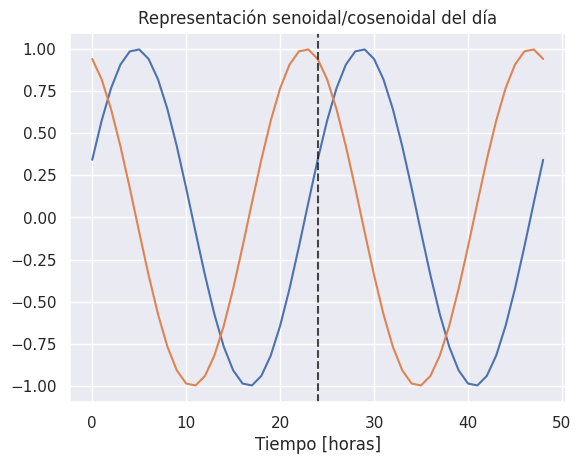

In [40]:
# Representar la hora con senos y cosenos
dia_sin = np.sin(tiempo_s * (2 * np.pi / dia))
dia_cos = np.cos(tiempo_s * (2 * np.pi / dia))

# Graficar 2 días (48 horas)
fig, ax = plt.subplots()
plt.plot(np.array(dia_sin)[:49])
plt.plot(np.array(dia_cos)[:49])
plt.xlabel('Tiempo [horas]')
plt.title('Representación senoidal/cosenoidal del día')

# Dibujar línea vertical en 24 horas
ax.axvline(24, color='k', linestyle='--', alpha=0.8);

> Con la codificación senoidal y cosenoidal cada instante de tiempo es codificado con un valor único.

Teniendo esto claro, ahora sí podemos codificar las variables temporales (año y día) usando senos y cosenos.

Almacenaremos estas codificaciones en nuevas columnas: `dia_sin`, `dia_cos`, `year_sin`, `year_cos`.

Es importante observar que:

> No es necesario combinar días (seno y coseno) y años (seno y coseno) en una misma variable. Durante el entrenamiento el modelo LSTM aprenderá a ponderarlas de la manera más adecuada.

Este sería el código requerido:

In [41]:
year = (365.2425) * dia  # Calcula la duración promedio de un año (en segundos) a partir del valor de un día

df2['dia_sin'] = np.sin(tiempo_s * (2 * np.pi / dia))   # Codifica el ciclo diario usando la función seno
df2['dia_cos'] = np.cos(tiempo_s * (2 * np.pi / dia))   # Codifica el ciclo diario usando la función coseno
df2['year_sin'] = np.sin(tiempo_s * (2 * np.pi / year)) # Codifica el ciclo anual usando la función seno
df2['year_cos'] = np.cos(tiempo_s * (2 * np.pi / year)) # Codifica el ciclo anual usando la función coseno

df2  # Muestra el DataFrame (aunque probablemente debería ser df2 en este caso)


velocidad_viento_(m/s)  potencia_eólica_(kw)   dia_sin  \
datetime                                                                      
2014-10-07 01:20:00                    8.22             40.526173  0.342020   
2014-10-07 02:20:00                    5.94             11.799710  0.573576   
2014-10-07 03:20:00                    6.21             12.994380  0.766044   
2014-10-07 04:20:00                    6.29             14.668212  0.906308   
2014-10-07 05:20:00                    7.25             26.078764  0.984808   
...                                     ...                   ...       ...   
2015-10-06 19:20:00                    7.47             37.836385 -0.939693   
2015-10-06 20:20:00                    8.37             48.847419 -0.819152   
2015-10-06 21:20:00                    6.95             23.719858 -0.642788   
2015-10-06 22:20:00                    7.74             35.534461 -0.422618   
2015-10-06 23:20:00                    7.15             28.455153 -0.173648   

                      dia_cos  year_sin  year_cos  
datetime                                           
2014-10-07 01:20:00  0.939693 -0.995602  0.093681  
2014-10-07 02:20:00  0.819152 -0.995535  0.094394  
2014-10-07 03:20:00  0.642788 -0.995467  0.095108  
2014-10-07 04:20:00  0.422618 -0.995399  0.095822  
2014-10-07 05:20:00  0.173648 -0.995330  0.096535  
...                       ...       ...       ...  
2015-10-06 19:20:00  0.342020 -0.996360  0.085243  
2015-10-06 20:20:00  0.573576 -0.996299  0.085957  
2015-10-06 21:20:00  0.766044 -0.996237  0.086671  
2015-10-06 22:20:00  0.906308 -0.996175  0.087385  
2015-10-06 23:20:00  0.984808 -0.996112  0.088099  

[8759 rows x 6 columns]

Tengamos en cuenta que **NO será necesario escalar las 4 variables que acabamos de crear, pues ya están en el rango de -1 a 1**.

Para simplificar el *DataFrame* podemos quitar el índice con las marcas temporales, pues ya están codificadas (esto es opcional):

##5. Pre-procesamiento

Implica:

1. Partición en train/val/test (80%, 10%, 10%).
2. Generación del dataset supervisado: entrada y salida del modelo
3. Escalamiento **SIN INCLUIR LAS VARIABLES TEMPORALES**

En cada una de estas fases usaremos prácticamente el mismo código usado en los modelos univariados pero con algunas ligeras modificaciones.

### 5.1. Partición del set en entrenamiento, validación y prueba

Esta fase es idéntica a la implementada en el modelo anterior (multivariado - unistep).

A diferencia de otros modelos de Machine Learning, en el caso de series de tiempo **se debe garantizar que se generan las particiones sin mezclar aleatoriamente los datos**.

Recordemos además que:
- El set de entrenamiento (*train*) se usará para encontrar los parámetros del modelo
- El set de validación (*val*) para verificar que no haya *under/over-fitting* del modelo y para ajustar sus hiperparámetros
- El set de prueba (*test*) para poner a prueba el mejor modelo encontrado durante el entrenamiento/validación

En este caso usaremos la misma función implementada para los modelos univariados con la diferencia de que en lugar de introducir una *serie* de Pandas, introduciremos el *DataFrame* completo.

Por tanto, la función retornará tres *dataframes* (train, val y test):

In [42]:
# Función para generar las particiones preservando las características
# de la serie de tiempo

def train_val_test_split(dataframe, tr_size=0.8, vl_size=0.1, ts_size=0.1 ):
    # Definir número de datos en cada subserie
    N = dataframe.shape[0]
    Ntrain = int(tr_size*N)  # Número de datos de entrenamiento
    Nval = int(vl_size*N)    # Número de datos de validación
    Ntst = N - Ntrain - Nval # Número de datos de prueba

    # Realizar partición
    train = dataframe[0:Ntrain]
    val = dataframe[Ntrain:Ntrain+Nval]
    test = dataframe[Ntrain+Nval:]

    return train, val, test

# Prueba de la función
tr, vl, ts = train_val_test_split(df2)

print(f'Tamaño set de entrenamiento: {tr.shape}')
print(f'Tamaño set de validación: {vl.shape}')
print(f'Tamaño set de prueba: {ts.shape}')

Tamaño set de entrenamiento: (7007, 6)
Tamaño set de validación: (875, 6)
Tamaño set de prueba: (877, 6)


Observemos que en lugar de una columna cada subset tiene ahora 6  (correspondientes a las covariables).

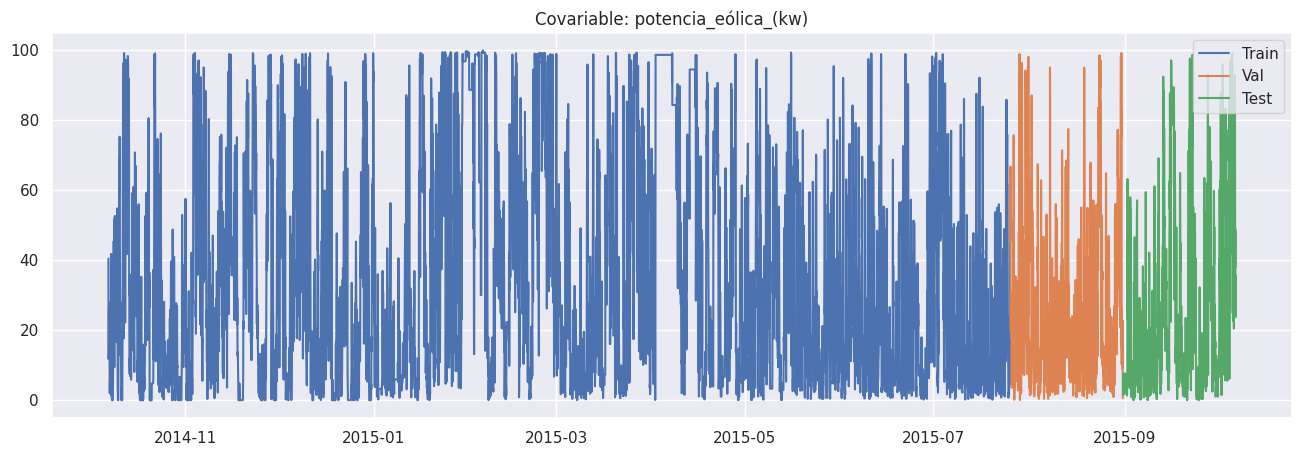

In [43]:
covar = 1 # Índice de la covariable (columna del dataset) a graficar
col = tr.columns[covar]

# Dibujar los sets de entrenamiento/validación/prueba para la covariable
fig, ax = plt.subplots(figsize = (16,5))
ax.plot(tr[col], label='Train')
ax.plot(vl[col], label='Val')
ax.plot(ts[col], label='Test')
ax.set_title(f'Covariable: {col}')
plt.legend();

###5.2 Generación del dataset supervisado (entrada y salida del modelo)



In [44]:
def crear_dataset_supervisado(array, input_length, output_length):
    '''Permite crear un dataset con las entradas (X) y salidas (Y)
    requeridas por la Red LSTM.

    Parámetros:
    - array: arreglo numpy de tamaño N x features (N: cantidad de datos,
      f: cantidad de features)
    - input_length: instantes de tiempo consecutivos de la(s) serie(s) de tiempo
      usados para alimentar el modelo
    - output_length: instantes de tiempo a pronosticar (salida del modelo)
    '''

    # Inicialización
    X, Y = [], []    # Listados que contendrán los datos de entrada y salida del modelo
    shape = array.shape
    if len(shape)==1: # Si tenemos sólo una serie (univariado)
        fils, cols = array.shape[0], 1
        array = array.reshape(fils,cols)
    else: # Multivariado <-- <--- ¡esta parte de la función se ejecuta en este caso!
        fils, cols = array.shape

    # Generar los arreglos
    for i in range(fils-input_length-output_length):
        X.append(array[i:i+INPUT_LENGTH,0:cols])
        Y.append(array[i+input_length:i+input_length+output_length,-1].reshape(output_length,1))

    # Convertir listas a arreglos de NumPy
    X = np.array(X)
    Y = np.array(Y)

    return X, Y

In [45]:
# Crear los datasets de entrenamiento, prueba y validación y verificar sus tamaños
INPUT_LENGTH = 24    # Hiperparámetro
OUTPUT_LENGTH = 4    # Modelo multi-step

x_tr, y_tr = crear_dataset_supervisado(tr.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_vl, y_vl = crear_dataset_supervisado(vl.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_ts, y_ts = crear_dataset_supervisado(ts.values, INPUT_LENGTH, OUTPUT_LENGTH)

# Imprimir información en pantalla
print('Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)')
print(f'Set de entrenamiento - x_tr: {x_tr.shape}, y_tr: {y_tr.shape}')
print(f'Set de validación - x_vl: {x_vl.shape}, y_vl: {y_vl.shape}')
print(f'Set de prueba - x_ts: {x_ts.shape}, y_ts: {y_ts.shape}')

Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)
Set de entrenamiento - x_tr: (6979, 24, 6), y_tr: (6979, 4, 1)
Set de validación - x_vl: (847, 24, 6), y_vl: (847, 4, 1)
Set de prueba - x_ts: (849, 24, 6), y_ts: (849, 4, 1)


###5.3 Escalamiento

Esta etapa es idéntica a la implementada en el modelo anterior (multivariado-unistep).

Sin embargo **es importante tener en cuenta que NO escalaremos las columnas que contienen las variables temporales (pues ya están en el rango de -1 a 1).

Así que es necesario modificar ligeramente la función que realiza el escalamiento:

In [46]:
for i, col in enumerate(tr.columns):
    print(i,col)

0 velocidad_viento_(m/s)
1 potencia_eólica_(kw)
2 dia_sin
3 dia_cos
4 year_sin
5 year_cos


In [47]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def escalar_dataset(data_input, col_ref_index):
    """
    Escala el dataset en el rango de -1 a 1.

    Entradas:
    - data_input: diccionario con los datasets de entrada y salida
      (data_input = {'x_tr': x_tr, 'y_tr': y_tr, 'x_vl': x_vl, 'y_vl': y_vl,
                     'x_ts': x_ts, 'y_ts': y_ts})
    - col_ref_index: índice de la columna de la variable a predecir

    Retorna:
    - data_scaled: diccionario con los datasets escalados
    - scaler: el escalador usado para la variable a predecir
    """

    # Número de instantes de tiempo de entrada y de covariables
    NSAMPLES = data_input['x_tr'].shape[1]
    NFEATS = data_input['x_tr'].shape[2]

    # Generar listado con scalers (1 por cada covariable de entrada)
    scalers = [MinMaxScaler(feature_range=(-1,1)) for i in range(NFEATS)]

    # Arreglos para datasets escalados
    x_tr_s = np.zeros(data_input['x_tr'].shape)
    x_vl_s = np.zeros(data_input['x_vl'].shape)
    x_ts_s = np.zeros(data_input['x_ts'].shape)
    y_tr_s = np.zeros(data_input['y_tr'].shape)
    y_vl_s = np.zeros(data_input['y_vl'].shape)
    y_ts_s = np.zeros(data_input['y_ts'].shape)

    # Escalamiento Xs: no escalar columnas temporales (11->14 si existen)
    FEAT_IDS = list(range(NFEATS))  # Escalamos todas las columnas si no hay temporales
    # Si hay columnas temporales específicas, se pueden excluir aquí
    for i in FEAT_IDS:
        x_tr_s[:,:,i] = scalers[i].fit_transform(data_input['x_tr'][:,:,i])
        x_vl_s[:,:,i] = scalers[i].transform(data_input['x_vl'][:,:,i])
        x_ts_s[:,:,i] = scalers[i].transform(data_input['x_ts'][:,:,i])

    # Escalamiento Ys (variable a predecir)
    y_tr_s[:,:,0] = scalers[col_ref_index].fit_transform(data_input['y_tr'][:,:,0])
    y_vl_s[:,:,0] = scalers[col_ref_index].transform(data_input['y_vl'][:,:,0])
    y_ts_s[:,:,0] = scalers[col_ref_index].transform(data_input['y_ts'][:,:,0])

    # Conformar diccionario de salida
    data_scaled = {
        'x_tr_s': x_tr_s, 'y_tr_s': y_tr_s,
        'x_vl_s': x_vl_s, 'y_vl_s': y_vl_s,
        'x_ts_s': x_ts_s, 'y_ts_s': y_ts_s,
    }

    return data_scaled, scalers[col_ref_index]


In [48]:
# Crear diccionario de entrada
data_in = {
    'x_tr': x_tr, 'y_tr': y_tr,
    'x_vl': x_vl, 'y_vl': y_vl,
    'x_ts': x_ts, 'y_ts': y_ts,
}

# Índice de la columna a predecir según tu código 1
col_ref_index = 1  # 'potencia_eólica_(kw)'

# Escalar datasets
data_s, scaler = escalar_dataset(data_in, col_ref_index)

# Extraer subsets escalados
x_tr_s, y_tr_s = data_s['x_tr_s'], data_s['y_tr_s']
x_vl_s, y_vl_s = data_s['x_vl_s'], data_s['y_vl_s']
x_ts_s, y_ts_s = data_s['x_ts_s'], data_s['y_ts_s']

# Imprimir para verificar
print("x_tr_s shape:", x_tr_s.shape)
print("y_tr_s shape:", y_tr_s.shape)
print("Primeros 5 valores de y_tr_s:\n", y_tr_s[:5,0,0])


x_tr_s shape: (6979, 24, 6)
y_tr_s shape: (6979, 4, 1)
Primeros 5 valores de y_tr_s:
 [0.1107933  0.11150564 0.11221792 0.11293015 0.11364232]


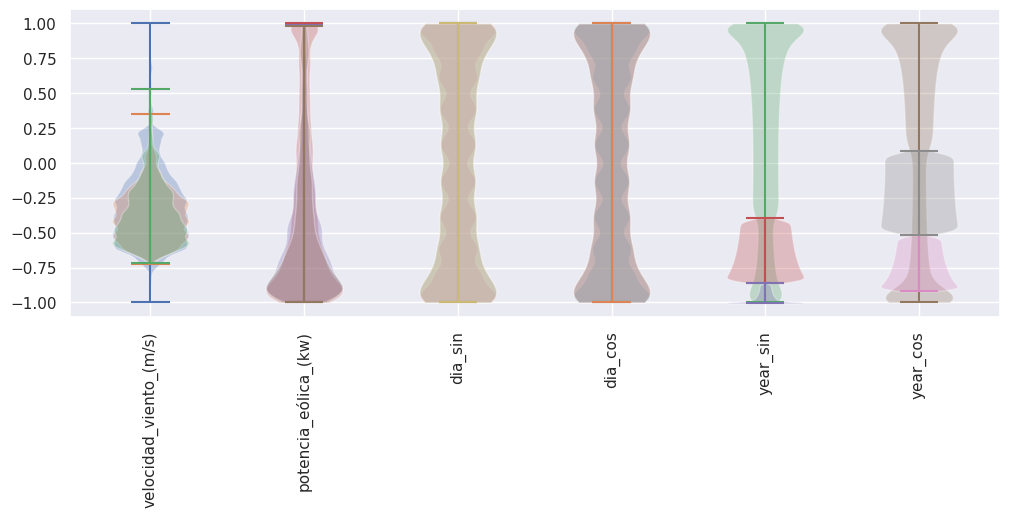

In [49]:
# Y generemos una gráfica tipo violín para ver la distribución
# de los valores en cada covariable (entrada) y en la variable a
# predecir (salida)

fig, ax = plt.subplots(figsize=(12,4))
num_features = x_tr_s.shape[2] # Get the actual number of features (6 in this case)
for i in range(num_features):
    ax.violinplot(dataset=x_tr_s[:,:,i].flatten(), positions=[i])
    ax.violinplot(dataset=x_vl_s[:,:,i].flatten(), positions=[i])
    ax.violinplot(dataset=x_ts_s[:,:,i].flatten(), positions=[i])

# Etiquetas eje horizontal
ax.set_xticks(list(range(num_features)))
ax.set_xticklabels(df2.columns, rotation=90) # Use df2.columns for correct feature names
ax.autoscale();

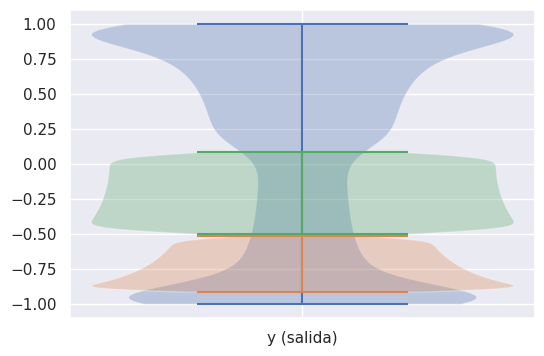

In [50]:
# Y hagamos lo mismo con la variable de salida:
fig, ax = plt.subplots(figsize=(6,4))
ax.violinplot(dataset=y_tr_s.flatten())
ax.violinplot(dataset=y_vl_s.flatten())
ax.violinplot(dataset=y_ts_s.flatten())
ax.set_xticks([1])
ax.set_xticklabels(['y (salida)']);

#5. Creación y entrenamiento del modelo

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf

# ---------------------------
# Reproducibilidad
# ---------------------------
tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()  # Sin argumentos, así evita el error

# ---------------------------
# Parámetros del modelo
# ---------------------------
N_UNITS = 128  # Tamaño del estado oculto del LSTM
INPUT_SHAPE = (x_tr_s.shape[1], x_tr_s.shape[2])  # (n_timesteps, n_features)
OUTPUT_LENGTH = y_tr_s.shape[1]  # Número de pasos a predecir (ej. 4 horas)

# ---------------------------
# Creación del modelo
# ---------------------------
modelo = Sequential([
    LSTM(N_UNITS, input_shape=INPUT_SHAPE),
    Dense(OUTPUT_LENGTH, activation='linear')  # Activación lineal para regresión
])

# ---------------------------
# Función de pérdida RMSE
# ---------------------------
def root_mean_squared_error(y_true, y_pred):
    return tf.math.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

# ---------------------------
# Compilación del modelo
# ---------------------------
optimizador = RMSprop(learning_rate=5e-4)
modelo.compile(optimizer=optimizador, loss=root_mean_squared_error)

# ---------------------------
# Entrenamiento
# ---------------------------
EPOCHS = 55
BATCH_SIZE = 256

historia = modelo.fit(
    x_tr_s, y_tr_s,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_vl_s, y_vl_s),
    verbose=2
)


Epoch 1/55


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



28/28 - 3s - 106ms/step - loss: 0.2434 - val_loss: 0.0643
Epoch 2/55
28/28 - 2s - 76ms/step - loss: 0.0600 - val_loss: 0.0448
Epoch 3/55
28/28 - 2s - 78ms/step - loss: 0.0537 - val_loss: 0.0410
Epoch 4/55
28/28 - 2s - 64ms/step - loss: 0.0513 - val_loss: 0.0389
Epoch 5/55
28/28 - 2s - 85ms/step - loss: 0.0496 - val_loss: 0.0392
Epoch 6/55
28/28 - 2s - 63ms/step - loss: 0.0481 - val_loss: 0.0444
Epoch 7/55
28/28 - 2s - 63ms/step - loss: 0.0467 - val_loss: 0.0514
Epoch 8/55
28/28 - 2s - 86ms/step - loss: 0.0455 - val_loss: 0.0579
Epoch 9/55
28/28 - 2s - 61ms/step - loss: 0.0443 - val_loss: 0.0634
Epoch 10/55
28/28 - 2s - 63ms/step - loss: 0.0432 - val_loss: 0.0673
Epoch 11/55
28/28 - 2s - 83ms/step - loss: 0.0422 - val_loss: 0.0699
Epoch 12/55
28/28 - 2s - 64ms/step - loss: 0.0413 - val_loss: 0.0720
Epoch 13/55
28/28 - 2s - 60ms/step - loss: 0.0405 - val_loss: 0.0735
Epoch 14/55
28/28 - 2s - 61ms/step - loss: 0.0398 - val_loss: 0.0740
Epoch 15/55
28/28 - 3s - 91ms/step - loss: 0.0390 - v

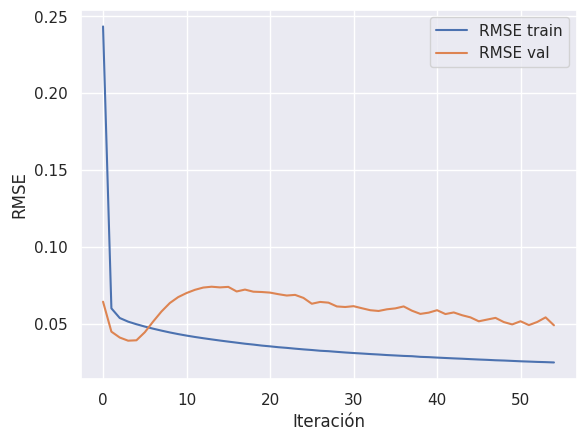

In [52]:
 # Graficar curvas de entrenamiento y validación
 # para verificar que no existe overfitting
plt.plot(historia.history['loss'],label='RMSE train')
plt.plot(historia.history['val_loss'],label='RMSE val')
plt.xlabel('Iteración')
plt.ylabel('RMSE')
plt.legend();

Observaciones y sugerencias:

Al incluir las variables temporales obtenemos un RMSE ligeramente inferior al del tutorial anterior (0.118 vs. 0.120)
En todo caso es importante tener en cuenta que se sugiere afinar los hiperparámetros de cada modelo para poder realizar comparaciones concluyentes.
Al igual que en el caso del modelo multivariado-unistep en este caso, además de la afinación de hiperparámetros, se sugierer realizar un análisis de feature importances para determinar las covariables más relevantes en la predicción.
De nuevo, en la afinación se deberían considerar los siguientes hiperparámetros:

INPUT_LENGTH y OUTPUT_LENGTH (esto implica modificar la fase de pre-procesamiento)
Número de unidades de la Red LSTM
Pérdida
Tasa de aprendizaje
Epochs
Batch size

## 6. Desempeño del modelo

Suponiendo que el modelo ya ha sido afinado y entrenado, verificaremos su desempeño para el set de prueba y lo compararemos con el desempeño obtenido con los sets de entrenamiento y validación:

In [53]:
# Cálculo de rmses para train, val y test
rmse_tr = modelo.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_vl = modelo.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
rmse_ts = modelo.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)

# Imprimir resultados en pantalla
print('Comparativo desempeños:')
print(f'  RMSE train:\t {rmse_tr:.3f}')
print(f'  RMSE val:\t {rmse_vl:.3f}')
print(f'  RMSE test:\t {rmse_ts:.3f}')

Comparativo desempeños:
  RMSE train:	 0.028
  RMSE val:	 0.049
  RMSE test:	 0.034


El desempeño para el set de prueba es comparable
(aunque ligeramente inferior) con los sets de entrenamiento y validación y por tanto podemos concluir que el modelo generaliza adecuadamente.

De nuevo, se debería afinar el modelo + realizar análisis de *feature importances* para intentar mejorar el desempeño.

Al igual que hicimos con el modelo univariado-multistep analicemos los errores (RMSEs) individuales para cada una de las horas predichas, para lo cual:

1. Generaremos las predicciones sobre la totalidad del set de prueba con el modelo entrenado.
2. Calcularemos y graficaremos el RMSE para cada instante de tiempo predicho

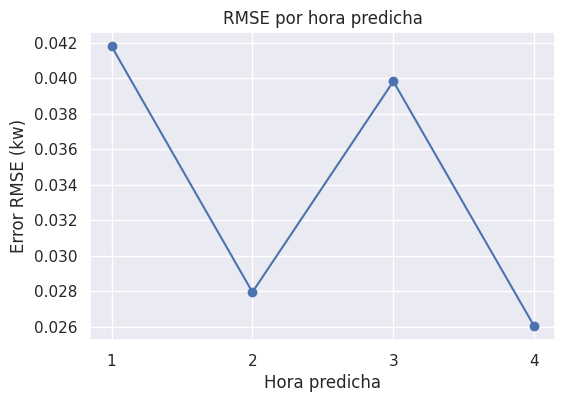

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generar las predicciones sobre el set de prueba
y_ts_pred_s = modelo.predict(x_ts_s, verbose=0)

# 2. Transformación inversa a escala original
y_ts_pred = scaler.inverse_transform(y_ts_pred_s)

# Asegurarse de que y_ts tenga la misma forma
y_true = y_ts.reshape(y_ts.shape[0], y_ts.shape[1])

# 3. Calcular RMSE por cada paso de tiempo
diff_cuad = np.square(y_true - y_ts_pred)  # (n_samples, OUTPUT_LENGTH)
rmse = np.sqrt(np.mean(diff_cuad, axis=0))  # (OUTPUT_LENGTH,)

# 4. Graficar RMSE por hora predicha
t = np.arange(1, OUTPUT_LENGTH + 1)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(t, rmse, marker='o', linestyle='-', color='b')
ax.set_xlabel('Hora predicha')
ax.set_ylabel('Error RMSE (kw)')
ax.set_title('RMSE por hora predicha')
ax.set_xticks(t)
ax.grid(True)
plt.show()


##7. Predicciones con el modelo entrenado

Suponiendo que el modelo ya ha sido afinado, podemos ponerlo a prueba con el set *test*.

Usaremos la misma función `predecir` usada en los videos anteriores:

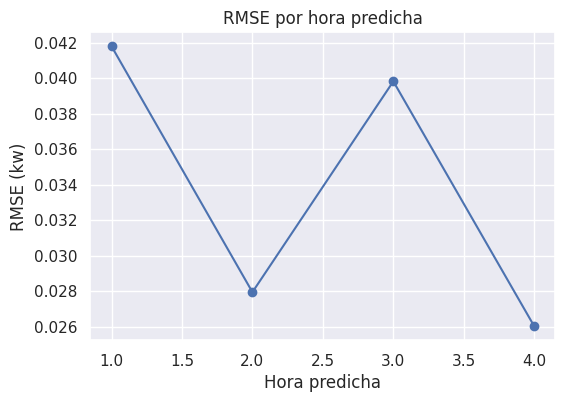

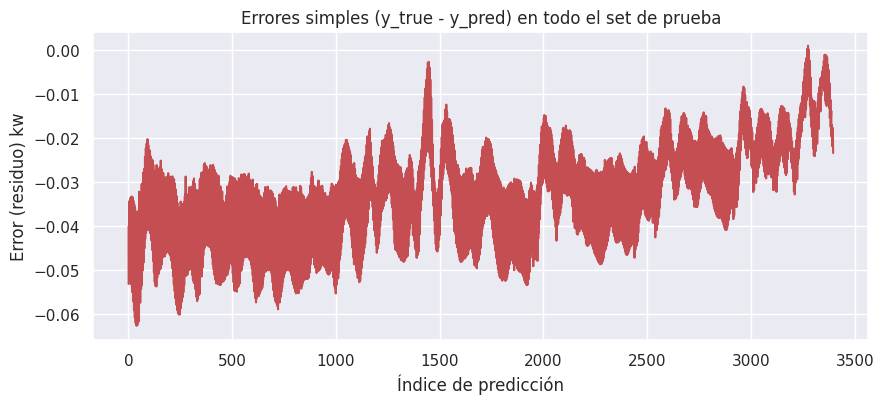

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# 1. Predicciones sobre el set de prueba
# ---------------------------
y_ts_pred_s = modelo.predict(x_ts_s, verbose=0) # Use model.predict for batch predictions
y_ts_pred = scaler.inverse_transform(y_ts_pred_s) # Inverse transform to original scale

# ---------------------------
# 2. Asegurarse de que y_ts tenga la misma forma que y_ts_pred
# ---------------------------
y_true = y_ts.reshape(y_ts.shape[0], y_ts.shape[1])

# ---------------------------
# 3. Calcular RMSE por cada hora predicha
# ---------------------------
diff_cuad = np.square(y_true - y_ts_pred)  # (n_samples, OUTPUT_LENGTH)
rmse = np.sqrt(np.mean(diff_cuad, axis=0))  # (OUTPUT_LENGTH,)

# Graficar RMSE por hora
t = np.arange(1, y_ts_pred.shape[1]+1)
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(t, rmse, marker='o', linestyle='-', color='b')
ax.set_xlabel('Hora predicha')
ax.set_ylabel('RMSE (kw)')
ax.set_title('RMSE por hora predicha')
ax.grid(True)
plt.show()

# ---------------------------
# 4. Cálculo y gráfico de errores simples (residuales)
# ---------------------------
# Errores simples
errores = y_true.flatten() - y_ts_pred.flatten()

# Adjust ndato to match the flattened errors
N_total_errors = errores.shape[0]
ndato = np.arange(1, N_total_errors + 1)

# Graficar errores
plt.figure(figsize=(10,4))
plt.plot(ndato, errores, color='r')
plt.xlabel('Índice de predicción')
plt.ylabel('Error (residuo) kw')
plt.title('Errores simples (y_true - y_pred) en todo el set de prueba')
plt.grid(True)
plt.show()


# PROYECTO 3 : " TIPO TEXTO"

## Análisis y Clustering de No Conformidades en Auditorías Planta de Alimentos y prediccion de medidas de auditorias futuros.

Resumen técnico del dataset "medidas-respuestas y análisis causa auditorías planta de alimentos":

El dataset contiene datos tabulares sobre auditorías en una planta de alimentos, incluyendo columnas como "Status", fechas de implementación, "Análisis de Causa", "Acción Correctiva Inmediata" y responsables. Es adecuado para aplicar aprendizaje no supervisado,

##1.- Carga del archivo Excel y visualización de hojas

In [56]:
import pandas as pd
import requests
from tabulate import tabulate
import io

url = "https://raw.githubusercontent.com/witman92/Proyectos-Aplicaci-n-de-Aprendizaje-No-Supervisado-PCA-Clustering-/5b993113a21858b182b0ee97323274ac7b614b49/03.-Dataset-medidas-respuestas%20y%20analisis%20causa%20auditorias%20planta%20de%20alimentos.XLSX"

try:
    df_sheets = pd.read_excel(io.BytesIO(requests.get(url).content), sheet_name=None, engine='openpyxl')
    print("Hojas encontradas:\n" + '\n'.join(f"{i+1}. {s}" for i, s in enumerate(df_sheets)))

    df = next(iter(df_sheets.values()))
    print(f"\nPrimeros datos de '{list(df_sheets)[0]}':")
    print(tabulate(df.head(10), headers='keys', tablefmt='pretty', showindex=False))
    print(f"\nDimensiones: {df.shape}")

except Exception as e:
    print(f"\nError: {e}")

Hojas encontradas:
1. Sheet1

Primeros datos de 'Sheet1':
+-------------------------+-------------------------+---------------------+------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------+------------------------+----------------------------------------------------------------------------------------------------------------------------------------+--------------------------------+----------------+
|        Auditoría        |      Denominación       |       Creado        |                                           Acción Correctiva Inmediata                                            |                                  Seguimiento                                   |          Area          |                                                           Análisis de Causa                                                            | Fecha Envío Informe a au

##2.-Verificación de valores faltantes (NaNs)

In [57]:
# Verificar si hay datos faltantes
print('Cantidad de NaNs:')
for column in df:
    nans = df[column].isna().sum()
    print(f'\tColumna {column}: {nans}')

Cantidad de NaNs:
	Columna Auditoría: 0
	Columna Denominación: 1390
	Columna Creado : 0
	Columna Acción Correctiva Inmediata: 459
	Columna Seguimiento: 1067
	Columna Area: 10
	Columna Análisis de Causa: 417
	Columna Fecha Envío Informe a auditado: 652
	Columna Status usuario: 12


###3.-Imputación de valores faltantes

In [58]:
columns_to_fill = ['Denominación', 'Acción Correctiva Inmediata', 'Seguimiento', 'Análisis de Causa', 'Status usuario', 'Area', 'Fecha Envío Informe a auditado']
df[columns_to_fill] = df[columns_to_fill].fillna('Desconocido')

print("Valores faltantes después de la imputación con 'Desconocido':")
print(df[columns_to_fill].isnull().sum().to_string())

Valores faltantes después de la imputación con 'Desconocido':
Denominación                      0
Acción Correctiva Inmediata       0
Seguimiento                       0
Análisis de Causa                 0
Status usuario                    0
Area                              0
Fecha Envío Informe a auditado    0


###4.-Separación de variable objetivo 'y_area'

In [59]:
y_area = df['Area']
print(f"Variable objetivo 'y_area' asignada. Primeros 5 valores:\n{y_area.head().tolist()}")

Variable objetivo 'y_area' asignada. Primeros 5 valores:
['SERVICIOS GENERALES TE', 'SERVICIOS GENERALES TE', 'SERVICIOS GENERALES TE', 'SERVICIOS GENERALES TE', 'SERVICIOS GENERALES TE']


###5.-Creación de X_for_area_base (predictores)

In [60]:
X_for_area_base = df.drop(columns=['Area', 'cluster'], errors='ignore').copy()
print(f"X_for_area_base creado con dimensiones: {X_for_area_base.shape}")
print("Primeras 5 filas de X_for_area_base (primeras 5 columnas):")
print(X_for_area_base.iloc[:, :5].head().to_markdown(index=False))

X_for_area_base creado con dimensiones: (8320, 8)
Primeras 5 filas de X_for_area_base (primeras 5 columnas):
| Auditoría          | Denominación          | Creado              | Acción Correctiva Inmediata   | Seguimiento   |
|:-------------------|:----------------------|:--------------------|:------------------------------|:--------------|
| INS SSGG S2 OCT 25 | 3.1 SG OCT S2 25 TE   | 2025-11-05 00:00:00 | Desconocido                   | Desconocido   |
| INS SSGG S2 OCT 25 | 2.6 SG OCT S2 25 TE   | 2025-11-05 00:00:00 | Desconocido                   | Desconocido   |
| INS SSGG S2 OCT 25 | 5.11 SG OCT S2 25 TE  | 2025-11-05 00:00:00 | Desconocido                   | Desconocido   |
| INS SSGG S2 OCT 25 | 5.4.1 SG OCT S2 25 TE | 2025-11-05 00:00:00 | Desconocido                   | Desconocido   |
| INS SSGG S2 OCT 25 | 5.4.2 SG OCT S2 25 TE | 2025-11-05 00:00:00 | Desconocido                   | Desconocido   |


###6.-Conversión de columnas datetime a timestamp/Conversión de columnas fecha hora a marca de tiempo

In [62]:
for col in X_for_area_base.select_dtypes(include='datetime64[ns]').columns:
    X_for_area_base[col] = X_for_area_base[col].apply(lambda x: x.timestamp() if pd.notna(x) else x)

print("✅ Columnas de fecha convertidas a timestamp numérico en X_for_area_base.")
print("Tipos de datos de X_for_area_base después de la conversión de fechas:")
print(X_for_area_base.info())

✅ Columnas de fecha convertidas a timestamp numérico en X_for_area_base.
Tipos de datos de X_for_area_base después de la conversión de fechas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8320 entries, 0 to 8319
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Auditoría                       8320 non-null   object 
 1   Denominación                    8320 non-null   object 
 2   Creado                          8320 non-null   float64
 3   Acción Correctiva Inmediata     8320 non-null   object 
 4   Seguimiento                     8320 non-null   object 
 5   Análisis de Causa               8320 non-null   object 
 6   Fecha Envío Informe a auditado  8320 non-null   object 
 7   Status usuario                  8320 non-null   object 
dtypes: float64(1), object(7)
memory usage: 520.1+ KB
None


### 7.-One-Hot Encoding de columnas categóricas/Codificación One-Hot de columnas categóricas

In [64]:
categorical_cols_for_area = X_for_area_base.select_dtypes(include='object').columns
X_for_area_encoded = pd.get_dummies(X_for_area_base, columns=categorical_cols_for_area, drop_first=True)

print("✅ One-Hot Encoding aplicado a columnas categóricas de X_for_area_base.")
print(f"Dimensiones de X_for_area_encoded: {X_for_area_encoded.shape}")
print("Primeras 5 filas de X_for_area_encoded (primeras 5 columnas):")
print(X_for_area_encoded.iloc[:, :5].head().to_markdown(index=False))

✅ One-Hot Encoding aplicado a columnas categóricas de X_for_area_base.
Dimensiones de X_for_area_encoded: (8320, 25208)
Primeras 5 filas de X_for_area_encoded (primeras 5 columnas):
|    Creado  | Auditoría_ERROR ANTERIOR 23   | Auditoría_I-ALM NOR ABR S1-25   | Auditoría_I-ALM NOR ABR S2-25   | Auditoría_I-ALM NOR AGO S1-25   |
|-----------:|:------------------------------|:--------------------------------|:--------------------------------|:--------------------------------|
| 1.7623e+09 | False                         | False                           | False                           | False                           |
| 1.7623e+09 | False                         | False                           | False                           | False                           |
| 1.7623e+09 | False                         | False                           | False                           | False                           |
| 1.7623e+09 | False                         | False                     

###8.-Conversión de booleanos a 0/1 y manejo de NaN/inf

In [65]:
import numpy as np

# Convert boolean columns to integer type (0 or 1)
for col in X_for_area_encoded.select_dtypes(include='bool').columns:
    X_for_area_encoded[col] = X_for_area_encoded[col].astype(int)

# Check for NaN and infinite values
nan_count = X_for_area_encoded.isnull().sum().sum()
inf_count = np.isinf(X_for_area_encoded).sum().sum()

if nan_count > 0:
    print(f"Advertencia: Se encontraron {nan_count} valores NaN en X_for_area_encoded. Imputando con 0.")
    X_for_area_encoded.fillna(0, inplace=True)

if inf_count > 0:
    print(f"Advertencia: Se encontraron {inf_count} valores infinitos en X_for_area_encoded. Reemplazando con NaN y luego imputando con 0.")
    X_for_area_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)
    X_for_area_encoded.fillna(0, inplace=True)

print("✅ Verificación y manejo de valores NaN/inf en X_for_area_encoded completado.")

✅ Verificación y manejo de valores NaN/inf en X_for_area_encoded completado.


###9.-Escalado de características (StandardScaler)

In [66]:
from sklearn.preprocessing import StandardScaler

# Inicializar un StandardScaler
scaler_area = StandardScaler()

# Escalar las características en X_for_area_encoded
X_for_area_scaled = scaler_area.fit_transform(X_for_area_encoded)

print("✅ Características 'X_for_area_encoded' escaladas correctamente.")
print(f"Dimensiones de X_for_area_scaled: {X_for_area_scaled.shape}")

✅ Características 'X_for_area_encoded' escaladas correctamente.
Dimensiones de X_for_area_scaled: (8320, 25208)


###10.-División en conjuntos de entrenamiento y prueba
- Se separan X_area_scaled y y_area en 80% entrenamiento y 20% prueba.

In [67]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_area_train, X_area_test, y_area_train, y_area_test = train_test_split(X_for_area_scaled, y_area, test_size=0.2, random_state=42)

print("✅ Datos para la predicción de 'Area' divididos en conjuntos de entrenamiento y prueba.")
print(f"Dimensiones de X_area_train: {X_area_train.shape}")
print(f"Dimensiones de X_area_test: {X_area_test.shape}")
print(f"Dimensiones de y_area_train: {y_area_train.shape}")
print(f"Dimensiones de y_area_test: {y_area_test.shape}")

✅ Datos para la predicción de 'Area' divididos en conjuntos de entrenamiento y prueba.
Dimensiones de X_area_train: (6656, 25208)
Dimensiones de X_area_test: (1664, 25208)
Dimensiones de y_area_train: (6656,)
Dimensiones de y_area_test: (1664,)


###11.-Entrenamiento RandomForestClassifier
-Se crea y entrena el modelo para predecir Area

In [68]:
from sklearn.ensemble import RandomForestClassifier

# Inicializar un RandomForestClassifier
area_model = RandomForestClassifier(random_state=42)

# Entrenar el modelo
area_model.fit(X_area_train, y_area_train)

print("✅ Modelo RandomForestClassifier para 'Area' entrenado exitosamente.")

✅ Modelo RandomForestClassifier para 'Area' entrenado exitosamente.


###12.-Predicciones sobre X_area_test
- Se generan predicciones en el conjunto de prueba.

- Se calcula y muestra la precisión global del modelo.

In [69]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# 1. Realizar predicciones en el conjunto de prueba
y_area_pred = area_model.predict(X_area_test)

print("✅ Predicciones realizadas en el conjunto de prueba para 'Area'.")

# 2. Calcular y mostrar la precisión (accuracy score)
accuracy_area = accuracy_score(y_area_test, y_area_pred)
print(f"\nPrecisión del modelo para 'Area': {accuracy_area:.4f}")

✅ Predicciones realizadas en el conjunto de prueba para 'Area'.

Precisión del modelo para 'Area': 0.8552


###13.-Informe de clasificación detallado

- Se muestran métricas como precisión, recall y F1-score por clase.

In [70]:

# 3. Generar y mostrar un informe de clasificación
print("\nInforme de Clasificación para 'Area':\n")
print(classification_report(y_area_test, y_area_pred))



Informe de Clasificación para 'Area':

                                 precision    recall  f1-score   support

              ADMINISTRACION TE       0.83      0.90      0.86        48
            BAÑOS&VESTIDORES TE       0.82      0.83      0.83       155
              BODEGA EXTERNA TE       1.00      1.00      1.00         2
                   BODEGA MP TE       0.87      0.88      0.87       107
                   BODEGA PT TE       0.94      0.84      0.89        75
                     CALDERA TE       0.91      0.66      0.76        32
                      CASINO TE       0.90      1.00      0.95        28
                     COMPOTA TE       0.77      0.88      0.82       181
                    Desconocido       1.00      0.50      0.67         4
         FOOD SERVICE&RETAIL TE       0.80      0.96      0.87       254
                 LABORATORIO TE       0.94      0.96      0.95        50
                  MANTENCION TE       1.00      0.71      0.83        35
          

###14.-Matriz de confusión (texto)

- Se calcula la matriz de confusión y se muestra como DataFrame con etiquetas legibles

In [72]:
# 4. Calcular y mostrar la matriz de confusión
conf_matrix_area = confusion_matrix(y_area_test, y_area_pred)
print("\nMatriz de Confusión para 'Area':\n")
# Convert confusion matrix to DataFrame for better readability
conf_matrix_df_area = pd.DataFrame(conf_matrix_area,
                                  index=[f'Real_{c}' for c in area_model.classes_],
                                  columns=[f'Pred_{c}' for c in area_model.classes_])
print(conf_matrix_df_area.to_markdown())


Matriz de Confusión para 'Area':

|                                      |   Pred_ADMINISTRACION TE |   Pred_BAÑOS&VESTIDORES TE |   Pred_BODEGA EXTERNA TE |   Pred_BODEGA MP TE |   Pred_BODEGA PT TE |   Pred_CALDERA TE |   Pred_CASINO TE |   Pred_COMPOTA TE |   Pred_Desconocido |   Pred_FOOD SERVICE&RETAIL TE |   Pred_LABORATORIO TE |   Pred_MANTENCION TE |   Pred_MANTENCIÓN FSR TE |   Pred_MANTENCIÓN PYP TE |   Pred_OF BODEGA TE |   Pred_OF PASTAS&PULPAS TE |   Pred_PASTA&PULPA TE |   Pred_PATIO ALMACENAMIENTO NORTE TE |   Pred_PATIO ALMACENAMIENTO SUR TE |   Pred_PATIO ENVASES TE |   Pred_PATIO TAMBORES TE |   Pred_PREPARACIÓN EMBARQUE TE |   Pred_PRODUCCION JUGO TE |   Pred_PRODUCCION Y ESTANQUES JUGOS TE |   Pred_RILES TE |   Pred_SALA DE INSUMO TE |   Pred_SALA ESTANQUE JUGO TE |   Pred_SECTOR RECICLADO TE |   Pred_SERVICIOS GENERALES TE |   Pred_TALLER GRUAS TE |
|:-------------------------------------|-------------------------:|---------------------------:|--------------------

###15.-Creación de DataFrame simulado de auditorías futuras

In [73]:
import pandas as pd

# 1. Crear un DataFrame de pandas llamado future_audits_df
# 2. Llenar este DataFrame con 3-5 filas de datos que simulen futuras entradas de auditoría.
# Asegurarse de incluir valores para todas las columnas presentes en el df original.
future_audits_df = pd.DataFrame({
    'Auditoría': [
        'INS SSGG S1 ENE 26',
        'INSP PT S2 FEB 26',
        'INSP CALIDAD MAR 26',
        'INSP ALMACEN S1 ABR 26'
    ],
    'Denominación': [
        '1.1 SG ENE S1 26 TE',
        '3.2 PT FEB S2 26 TE',
        'NC CALIDAD MAR S1 26',
        '4.5 ALM ABR S1 26 TE'
    ],
    'Creado': pd.to_datetime([
        '2026-01-10 09:00:00',
        '2026-02-15 10:30:00',
        '2026-03-20 11:00:00',
        '2026-04-05 08:45:00'
    ]),
    'Acción Correctiva Inmediata': [
        'Revisar procedimiento de limpieza en oficinas',
        'Reparar fuga menor en línea de envasado',
        'Capacitación del personal sobre nuevos protocolos de higiene',
        'Optimizar la distribución de productos en bodega'
    ],
    'Seguimiento': [
        'Seguimiento a 30 días para verificar implementación',
        'Verificación de reparación y ausencia de nuevas fugas',
        'Auditoría interna de seguimiento a capacitación',
        'Evaluación trimestral de eficiencia de bodega'
    ],
    'Area': [
        'SERVICIOS GENERALES TE',
        'PASTA&PULPA TE',
        'LABORATORIO TE',
        'BODEGA MP TE'
    ],
    'Análisis de Causa': [
        'Falta de supervisión de tareas de limpieza',
        'Desgaste de sello por uso prolongado',
        'Ausencia de actualización de manuales de procedimiento',
        'Mala organización del espacio de almacenamiento'
    ],
    'Fecha Envío Informe a auditado': pd.to_datetime([
        '2026-01-15 17:00:00',
        '2026-02-20 16:00:00',
        '2026-03-25 18:00:00',
        '2026-04-10 17:30:00'
    ]),
    'Status usuario': [
        'Medida abierta',
        'Medida abierta',
        'Medida abierta',
        'Medida abierta'
    ]
})

# 5. Imprimir las primeras filas del future_audits_df
print("✅ DataFrame 'future_audits_df' creado con éxito.")
print("Primeras filas del DataFrame de auditorías futuras:")
print(future_audits_df.to_markdown(index=False))

✅ DataFrame 'future_audits_df' creado con éxito.
Primeras filas del DataFrame de auditorías futuras:
| Auditoría              | Denominación         | Creado              | Acción Correctiva Inmediata                                  | Seguimiento                                           | Area                   | Análisis de Causa                                      | Fecha Envío Informe a auditado   | Status usuario   |
|:-----------------------|:---------------------|:--------------------|:-------------------------------------------------------------|:------------------------------------------------------|:-----------------------|:-------------------------------------------------------|:---------------------------------|:-----------------|
| INS SSGG S1 ENE 26     | 1.1 SG ENE S1 26 TE  | 2026-01-10 09:00:00 | Revisar procedimiento de limpieza en oficinas                | Seguimiento a 30 días para verificar implementación   | SERVICIOS GENERALES TE | Falta de supervisión de tarea

In [ ]:
from graphviz import Digraph

# Crear un objeto Digraph
dot = Digraph(comment='Pipeline Predicción Area', format='png')

# Definir los nodos (pasos)
steps = [
    "1. Cargar datos Excel",
    "2. Verificar valores faltantes",
    "3. Imputar NaNs con 'Desconocido'",
    "4. Separar variable objetivo 'y_area'",
    "5. Crear X_for_area_base",
    "6. Convertir datetime a timestamp",
    "7. One-Hot Encoding",
    "8. Convertir booleanos a 0/1 y manejar NaN/inf",
    "9. Escalar características",
    "10. División en train/test",
    "11. Entrenar RandomForestClassifier",
    "12. Predicciones sobre test set",
    "13. Evaluación (accuracy & report)",
    "14. Matriz de confusión",
    "15. Crear future_audits_df",
    "16. Preprocesar nuevas auditorías",
    "17. Codificar y escalar nuevas filas",
    "18. Predecir 'Area' para auditorías futuras"
]

# Agregar nodos al grafo
for i, step in enumerate(steps):
    dot.node(f"S{i+1}", step, shape='box')

# Conectar los nodos con flechas
for i in range(len(steps)-1):
    dot.edge(f"S{i+1}", f"S{i+2}")

# Guardar y visualizar el diagrama
dot.render('pipeline_area_flowchart', view=True)


'pipeline_area_flowchart.png'